In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

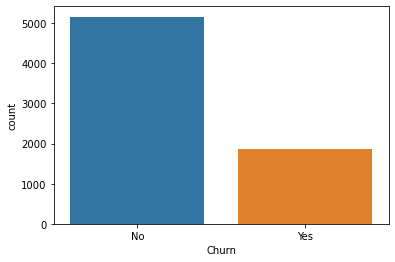

In [8]:
sns.countplot(data=df,x='Churn')

In [9]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.015683,0.219874,0.102411
tenure,0.015683,1.000000,0.246862,0.825880
MonthlyCharges,0.219874,0.246862,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


<AxesSubplot:xlabel='Contract', ylabel='TotalCharges'>

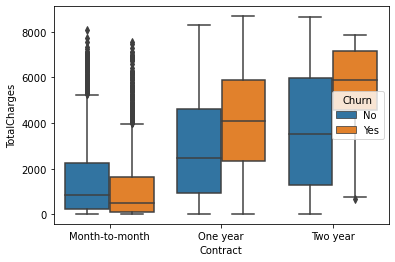

In [10]:
sns.boxplot(data=df,y='TotalCharges',x='Contract',hue='Churn')

In [18]:
df_corr = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
   'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','Churn']]).corr()

In [23]:
df_corr['Churn_Yes'].sort_values().iloc[1:-1]

Contract_Two year                         -0.301552
DeviceProtection_No internet service      -0.227578
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
InternetService_No                        -0.227578
TechSupport_No internet service           -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtec

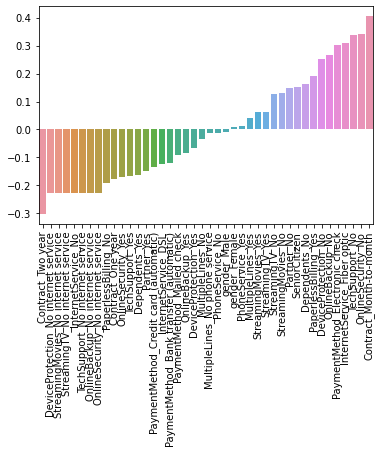

In [28]:

sns.barplot(x=df_corr['Churn_Yes'].sort_values().iloc[1:-1].index,
            y=df_corr['Churn_Yes'].sort_values().iloc[1:-1].values)
plt.xticks(rotation=90);

<AxesSubplot:xlabel='tenure', ylabel='Count'>

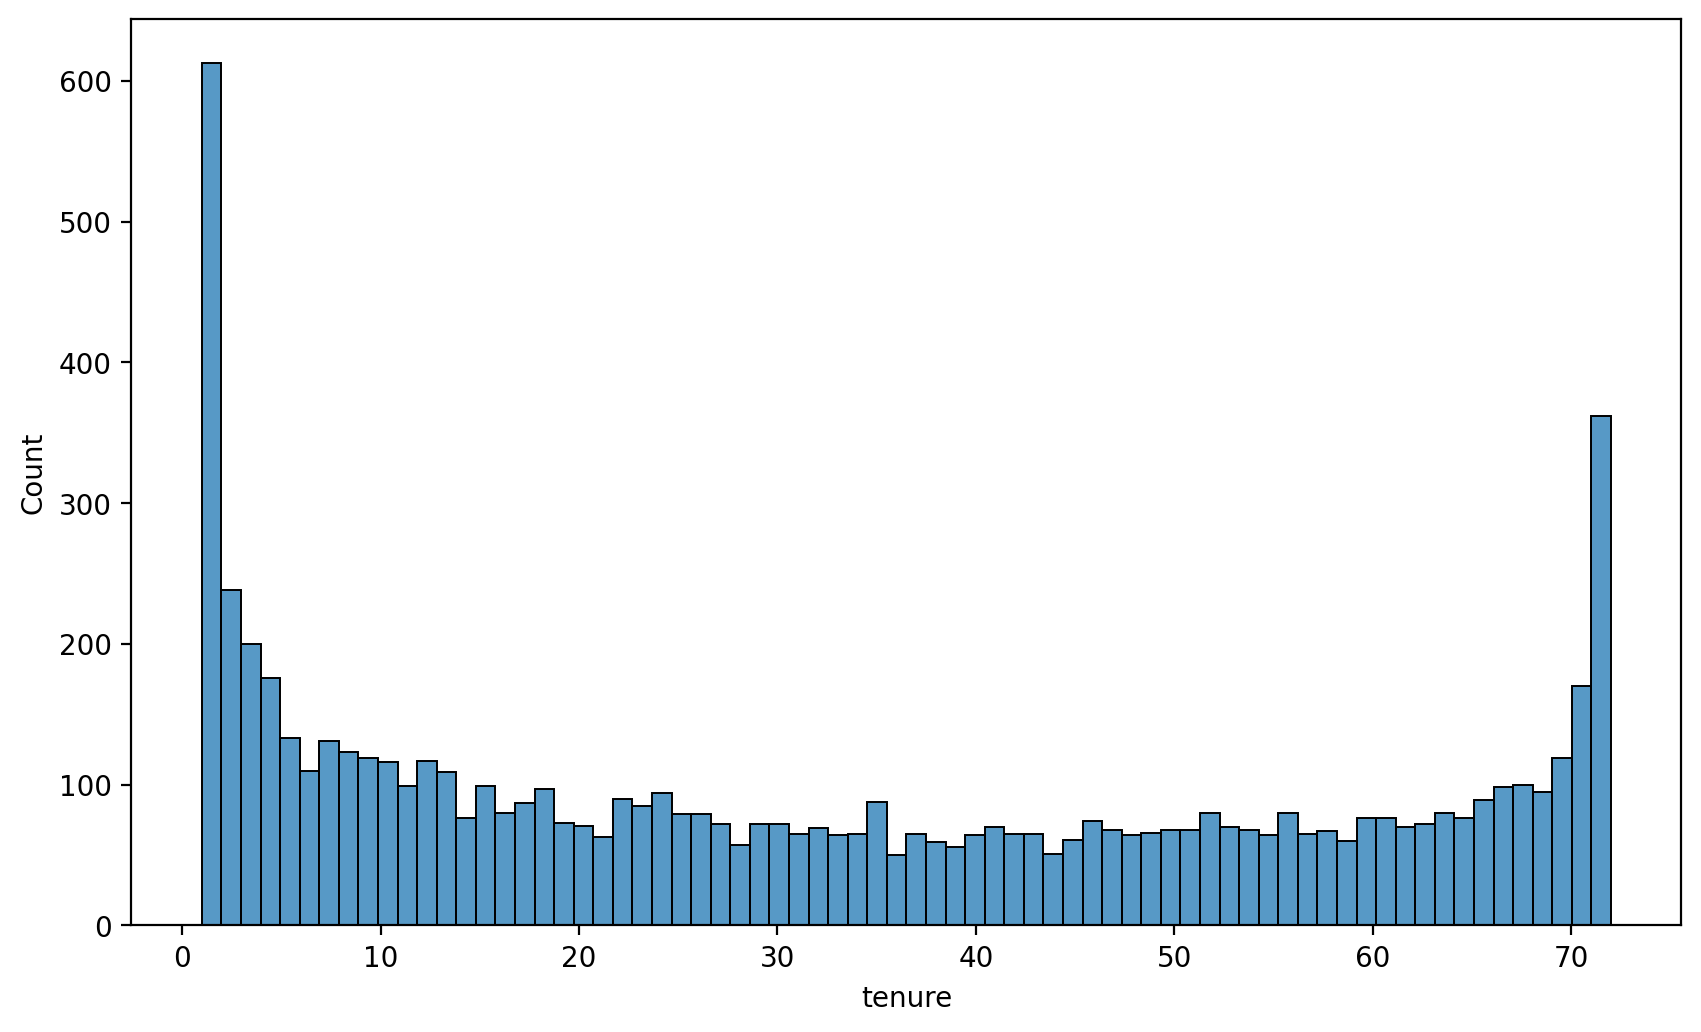

In [31]:
plt.figure(figsize=(10,6),dpi=200)
sns.histplot(data=df,x='tenure',bins=72)

In [32]:
no_churn = df.groupby(['Churn','tenure']).count().transpose()['No']
yes_churn = df.groupby(['Churn','tenure']).count().transpose()['Yes']

In [33]:
churn_rate = 100 * yes_churn/(no_churn+yes_churn)

In [35]:
churn_rate.transpose()['customerID']

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

<AxesSubplot:xlabel='tenure'>

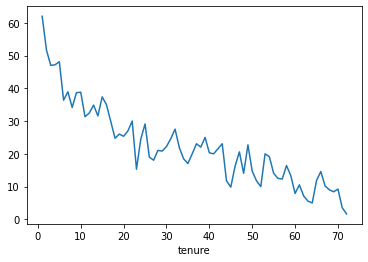

In [36]:
churn_rate.iloc[0].plot()

In [37]:
def cohort(tenure):
    if tenure < 13:
        return '0-12 Months'
    if tenure < 25:
        return '12-24 Months'
    if tenure < 49:
        return '24-48 Months'
    else:
        return 'Over 48 Months'

In [38]:
df['Tenure Cohort'] = df['tenure'].apply(cohort)

In [39]:
df[['tenure','Tenure Cohort']]

,tenure,Tenure Cohort
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months
...,...,...
7027,24,12-24 Months
7028,72,Over 48 Months
7029,11,0-12 Months
7030,4,0-12 Months


<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

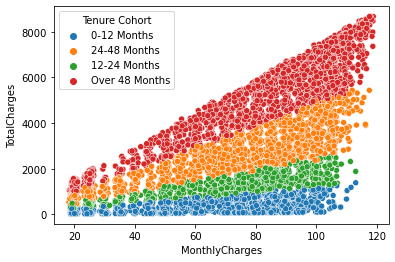

In [40]:
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Tenure Cohort')

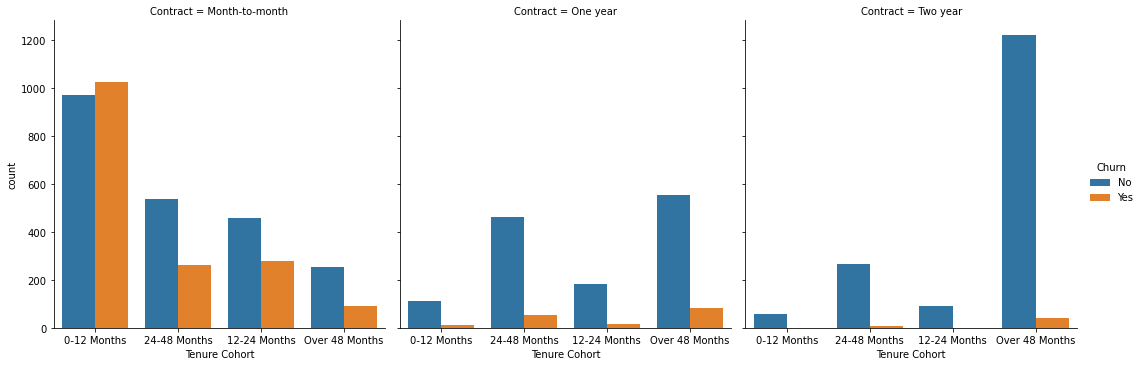

In [43]:
sns.catplot(x='Tenure Cohort',data=df,hue='Churn',col='Contract',kind='count')

In [53]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [47]:
X = df.drop(['customerID','Churn'],axis=1)

In [48]:
X = pd.get_dummies(X,drop_first=True)

In [49]:
y = df['Churn']

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [82]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  P

In [84]:
estimator = [64,100,128]
bootstrap = [True,False]
oob_score = [True]
param_grid = {'n_estimators':estimator,'bootstrap':bootstrap,'oob_score':oob_score}

In [85]:
rfc = RandomForestClassifier()
grid_model = GridSearchCV(rfc,param_grid)

In [86]:
grid_model.fit(X_train,y_train)

C:\Users\bashe\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bashe\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bashe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\bashe\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bashe\anaconda

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'n_estimators': [64, 100, 128], 'oob_score': [True]})

In [88]:
grid_model.best_params_

{'bootstrap': True, 'n_estimators': 100, 'oob_score': True}

In [89]:
from sklearn.metrics import accuracy_score,classification_report,plot_confusion_matrix,confusion_matrix

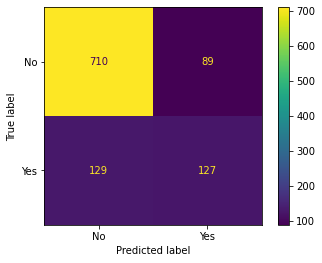

In [90]:
plot_confusion_matrix(grid_model,X_test,y_test)
preds = grid_model.predict(X_test)


In [91]:
from sklearn.ensemble import AdaBoostClassifier

In [92]:
ada = AdaBoostClassifier()

In [93]:
ada.fit(X_train,y_train)

AdaBoostClassifier()

In [94]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

          No       0.85      0.89      0.87       799
         Yes       0.59      0.50      0.54       256

    accuracy                           0.79      1055
   macro avg       0.72      0.69      0.70      1055
weighted avg       0.78      0.79      0.79      1055



In [95]:
ada_pred = ada.predict(X_test)

In [96]:
print(classification_report(y_test,ada_pred))

              precision    recall  f1-score   support

          No       0.87      0.92      0.89       799
         Yes       0.68      0.56      0.62       256

    accuracy                           0.83      1055
   macro avg       0.78      0.74      0.75      1055
weighted avg       0.82      0.83      0.82      1055



In [97]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)
    
    print(classification_report(y_test,preds))
    plot_confusion_matrix(model,X_test,y_test)
    
    

In [98]:
from sklearn.linear_model import LogisticRegression

In [99]:
from sklearn.preprocessing import StandardScaler

In [100]:
scaler = StandardScaler()

In [101]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

              precision    recall  f1-score   support

          No       0.86      0.91      0.89       799
         Yes       0.67      0.54      0.60       256

    accuracy                           0.82      1055
   macro avg       0.77      0.73      0.74      1055
weighted avg       0.82      0.82      0.82      1055



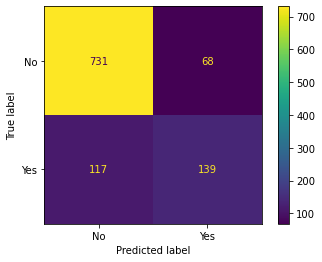

In [102]:
log_model = LogisticRegression()
run_model(log_model,scaled_X_train,y_train,scaled_X_test,y_test)

In [103]:
from sklearn.neighbors import KNeighborsClassifier

              precision    recall  f1-score   support

          No       0.86      0.87      0.87       799
         Yes       0.58      0.57      0.58       256

    accuracy                           0.80      1055
   macro avg       0.72      0.72      0.72      1055
weighted avg       0.79      0.80      0.80      1055



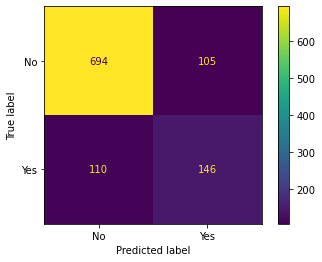

In [111]:
knn_model = KNeighborsClassifier(n_neighbors=9)
run_model(knn_model,scaled_X_train,y_train,scaled_X_test,y_test)

In [112]:
from sklearn.svm import SVC

C:\Users\bashe\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bashe\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bashe\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          No       0.76      1.00      0.86       799
         Yes       0.00      0.00      0.00       256

    accuracy                           0.76      1055
   macro avg       0.38      0.50      0.43      1055
weighted avg       0.57      0.76      0.65      1055



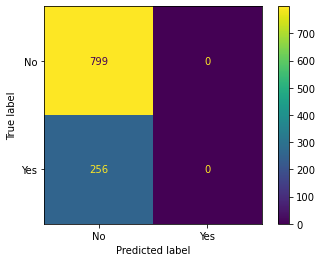

In [113]:
svc_model = SVC()
run_model(svc_model,X_train,y_train,X_test,y_test)